In [0]:
# For tensorflow 2.0 keras import must be from tensorflow.keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
import datetime, os
import numpy as np

# # Load the TensorBoard notebook extension
# %load_ext tensorboard

# from tensorflow.keras.callbacks import TensorBoard

# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = TensorBoard(logdir)

In [0]:
# perform one hot encoding
def vectorize_sequences(sequences, dimension=10000):

    results = np.zeros((len(sequences), dimension))

    for i, sequences in enumerate(sequences):
        
        results[i, sequences] = 1.
    
    return results

In [3]:
# load the imbd data 
# Consider 10000 Top most frequent words 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
train_data[0] 

In [5]:
# words are indexed by overall frequency in the dataset, 
# so that for instance the integer "3" encodes the 3rd most frequent word in the data. 

word_index = imdb.get_word_index()

# to see the index of Word giraffe
print('index of word giraffe {}'.format(word_index['giraffe']))


# to see the most frequently used word in the database
topkeyWord = [topkey for topkey, value in word_index.items() if value == 1]

print('the most frequently used word in the database {}'.format(topkeyWord))

1646592/1641221 [==============================] - 0s 0us/step
index of word giraffe 48148
the most frequently used word in the database ['the']


In [0]:
# pre-process the training data with one hot encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


# convert binary labels into float
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


# out of training seperate validation data 
x_val = x_train[:10000]
partial_x_train = x_train[10000: ]

# out of training seperate validation labels
y_val = y_train[:10000]
partial_y_train = y_train[10000:]



In [0]:

# build a NN model framework (a computational graph)
model = models.Sequential()
model.add(layers.Dense(16, activation= 'relu', input_shape= (10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Configures the model for training
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [8]:
# Trains the model for a fixed number of epochs (iterations on a dataset)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val)) 
                

Epoch 1/10
30/30 [==============================] - 1s 34ms/step - loss: 0.5490 - accuracy: 0.7573 - val_loss: 0.4272 - val_accuracy: 0.8602
Epoch 2/10
30/30 [==============================] - 1s 29ms/step - loss: 0.3414 - accuracy: 0.8995 - val_loss: 0.3278 - val_accuracy: 0.8834
Epoch 3/10
30/30 [==============================] - 1s 32ms/step - loss: 0.2464 - accuracy: 0.9233 - val_loss: 0.3101 - val_accuracy: 0.8761
Epoch 4/10
30/30 [==============================] - 1s 33ms/step - loss: 0.1941 - accuracy: 0.9392 - val_loss: 0.2754 - val_accuracy: 0.8904
Epoch 5/10
30/30 [==============================] - 1s 33ms/step - loss: 0.1587 - accuracy: 0.9526 - val_loss: 0.3077 - val_accuracy: 0.8767
Epoch 6/10
30/30 [==============================] - 1s 33ms/step - loss: 0.1312 - accuracy: 0.9601 - val_loss: 0.2910 - val_accuracy: 0.8869
Epoch 7/10
30/30 [==============================] - 1s 33ms/step - loss: 0.1089 - accuracy: 0.9684 - val_loss: 0.3002 - val_accuracy: 0.8835
Epoch 8/10
30

In [0]:
# Train with a Callback to TensorBoard
# history = model.fit(partial_x_train,
#                     partial_y_train,
#                     epochs=4,
#                     batch_size=512,
#                     validation_data=(x_val, y_val),
#                     callbacks= [tensorboard_callback])


# %tensorboard --logdir logs

# from tensorboard import notebook
# notebook.list() # View open TensorBoard instances


# # Control TensorBoard display. If no port is provided, 
# # the most recently launched TensorBoard is used
# notebook.display(port=6006, height=1000)

In [9]:

# Returns the loss value & metrics values for the model in test mode.


results = model.evaluate(x_test, y_test)
print('results {}'.format(results))

782/782 [==============================] - 1s 1ms/step - loss: 0.3994 - accuracy: 0.8672
results [0.3994337320327759, 0.8672000169754028]


In [10]:
# Generates output predictions for the input samples x_test
print('predicted test results {}'.format(model.predict(x_test)))

predicted test results [[0.06482509]
 [0.9995192 ]
 [0.7324914 ]
 ...
 [0.03584835]
 [0.01770636]
 [0.3618794 ]]


In [0]:
import matplotlib.pyplot as plt   



In [12]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

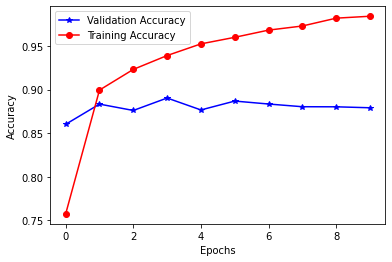

In [13]:
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy', color ='blue',marker = '*')
plt.plot(history_dict['accuracy'], label='Training Accuracy', color='red',marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

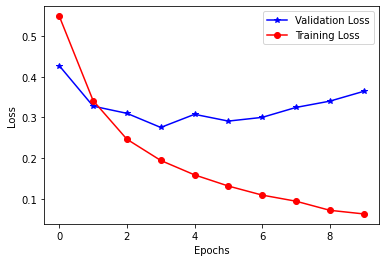

In [14]:
plt.plot(history_dict['val_loss'], label='Validation Loss', color ='blue',marker = '*')
plt.plot(history_dict['loss'], label='Training Loss', color='red',marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()